**DATA** **LOADING**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import regex as re
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Data Set Final Project.csv')
df.head(10)

,order_id,date,time,order_details.pizza_id,order_details.quantity,pizzas.pizza_type_id,pizzas.size,pizzas.price,pizza_sales,pizza_types.Column2,pizza_types.Column3
0,1,1/1/2015,11:38:36 AM,hawaiian_m,1.0,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic
1,2,1/1/2015,11:57:40 AM,classic_dlx_m,1.0,classic_dlx,M,16.00,16.00,The Classic Deluxe Pizza,Classic
2,2,1/1/2015,11:57:40 AM,thai_ckn_l,1.0,thai_ckn,L,20.75,20.75,The Thai Chicken Pizza,Chicken
3,2,1/1/2015,11:57:40 AM,five_cheese_l,1.0,five_cheese,L,18.50,18.50,The Five Cheese Pizza,Veggie
4,2,1/1/2015,11:57:40 AM,ital_supr_l,1.0,ital_supr,L,20.75,20.75,The Italian Supreme Pizza,Supreme
5,2,1/1/2015,11:57:40 AM,mexicana_m,1.0,mexicana,M,16.00,16.00,The Mexicana Pizza,Veggie
6,3,1/1/2015,12:12:28 PM,ital_supr_m,1.0,ital_supr,M,16.50,16.50,The Italian Supreme Pizza,Supreme
7,3,1/1/2015,12:12:28 PM,prsc_argla_l,1.0,prsc_argla,L,20.75,20.75,The Prosciutto and Arugula Pizza,Supreme
8,4,1/1/2015,12:16:31 PM,ital_supr_m,1.0,ital_supr,M,16.50,16.50,The Italian Supreme Pizza,Supreme
9,5,1/1/2015,12:21:30 PM,ital_supr_m,1.0,ital_supr,M,16.50,16.50,The Italian Supreme Pizza,Supreme


**DATA** **UNDERSTANDING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                48620 non-null  int64  
 1   date                    48620 non-null  object 
 2   time                    48620 non-null  object 
 3   order_details.pizza_id  48620 non-null  object 
 4   order_details.quantity  48620 non-null  float64
 5   pizzas.pizza_type_id    48620 non-null  object 
 6   pizzas.size             48620 non-null  object 
 7   pizzas.price            48620 non-null  float64
 8   pizza_sales             48620 non-null  float64
 9   pizza_types.Column2     48620 non-null  object 
 10  pizza_types.Column3     48620 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 4.1+ MB


In [ ]:
df.isnull().sum()

order_id                  0
date                      0
time                      0
order_details.pizza_id    0
order_details.quantity    0
pizzas.pizza_type_id      0
pizzas.size               0
pizzas.price              0
pizza_sales               0
pizza_types.Column2       0
pizza_types.Column3       0
dtype: int64

In [ ]:
df.shape

(48620, 11)

In [ ]:
df.describe()

,order_id,order_details.quantity,pizzas.price,pizza_sales
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,1.019622,16.494132,16.821474
std,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,9.750000,9.750000
25%,5337.000000,1.000000,12.750000,12.750000
50%,10682.500000,1.000000,16.500000,16.500000
75%,16100.000000,1.000000,20.250000,20.500000
max,21350.000000,4.000000,35.950000,83.000000


**DATA** **CLEANING**

In [ ]:
df_copy = df.copy()

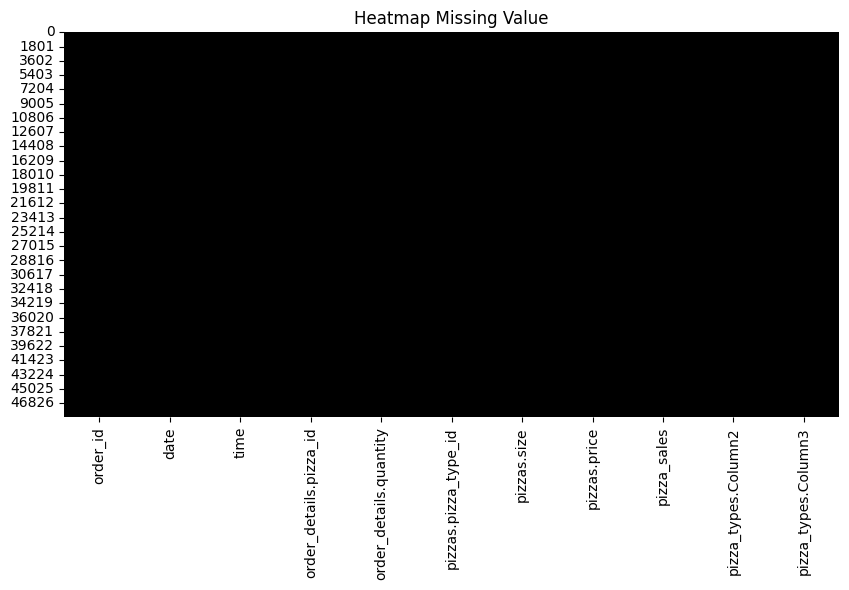

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_copy.isnull(), cbar = False, cmap="gray")
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

In [ ]:
df_copy.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

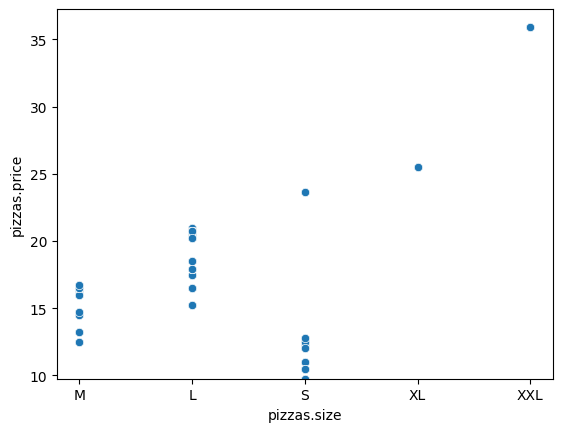

In [ ]:
y_label = 'pizzas.price'
x_label = 'pizzas.size'
sns.scatterplot( x=x_label, y=y_label, data=df_copy)
plt.ylim(bottom=df_copy[y_label].min())
plt.show

**EXPLORASI DATA ANALISIS**

Text(0.5, 1.0, 'order_details.quantity')

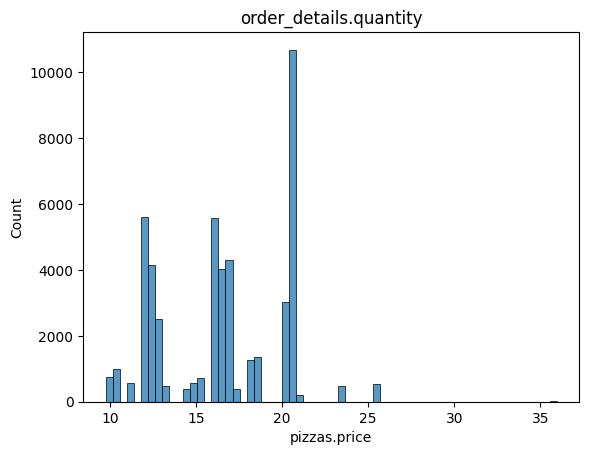

In [ ]:
sns.histplot(df_copy['pizzas.price'])
plt.title("order_details.quantity")

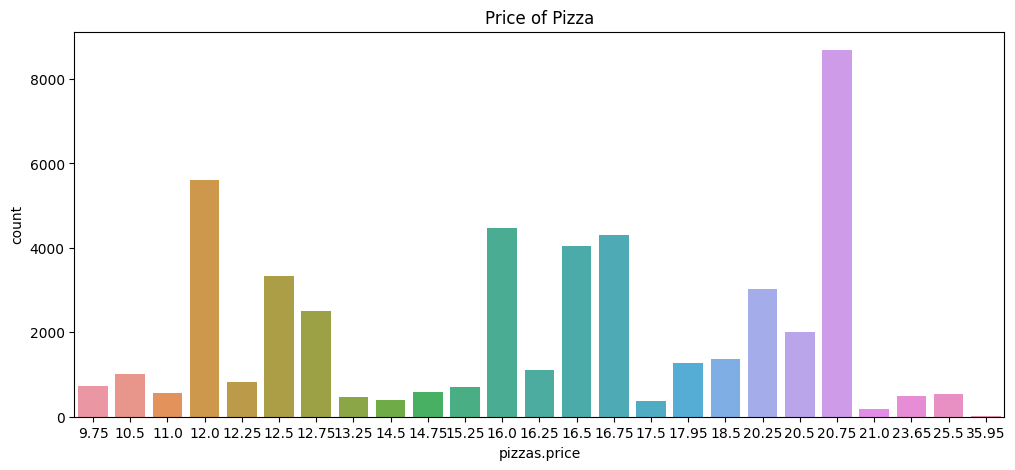

In [ ]:
plt.figure(figsize = (12 , 5))
sns.countplot(x = 'pizzas.price' , data = df_copy)
plt.title('Price of Pizza')
plt.show();

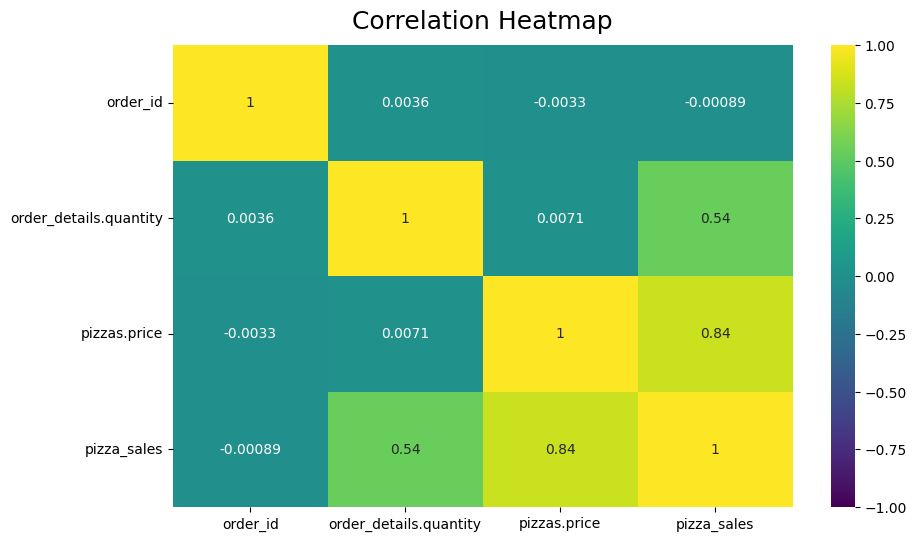

In [ ]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df_copy.corr(numeric_only = True), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

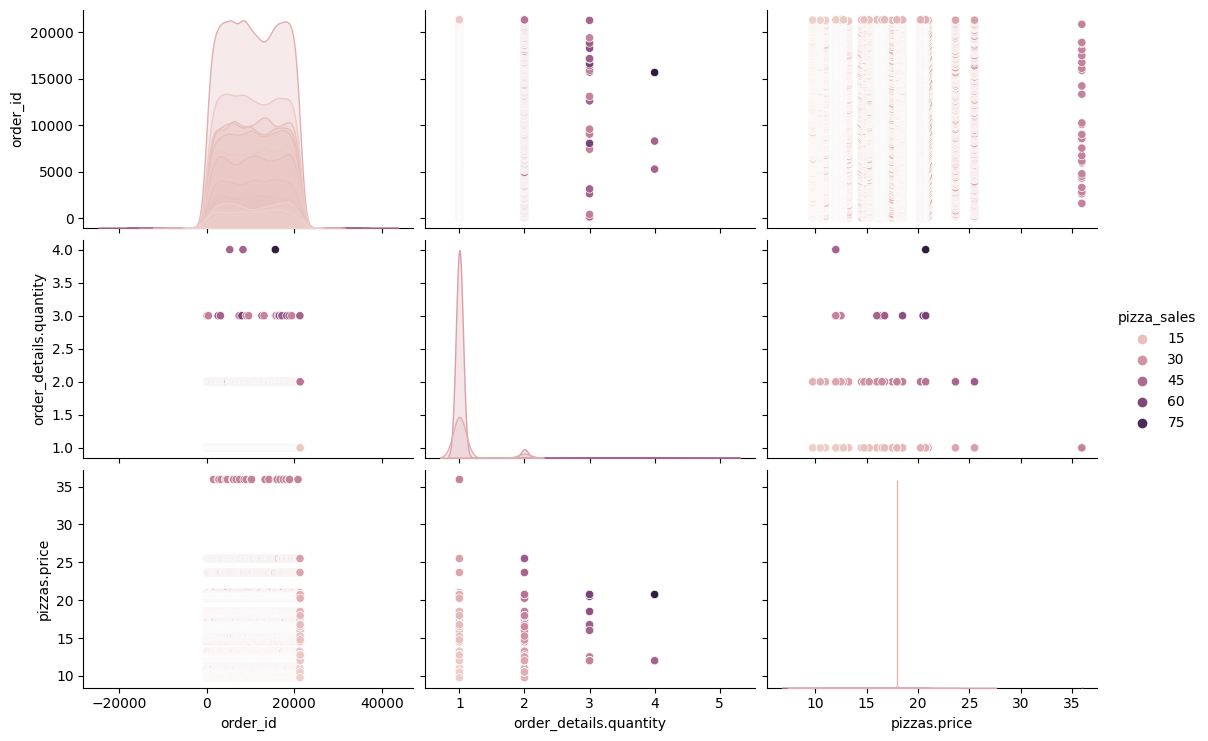

In [ ]:
sns.pairplot(df_copy.drop('date', axis=1), hue='pizza_sales', aspect=1.5)
plt.show()

**MODELING**

In [ ]:
df_split = df_copy.iloc[:, [4,8]]
df_split.head()

,order_details.quantity,pizza_sales
0,1.0,13.25
1,1.0,16.00
2,1.0,20.75
3,1.0,18.50
4,1.0,20.75


In [ ]:
n_clusters = range(2 , 10)
inertia_errors = []
silhouette_scores = []
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    model.fit(df_split)
    inertia_errors.append(model.inertia_)
    silhouette_scores.append(silhouette_score(df_split , model.labels_))
print("Inertia:", inertia_errors)
print()
print("Silhouette Scores:", silhouette_scores)

Inertia: [404247.46993688936, 205647.8222571571, 62950.16073049158, 43585.50073615124, 32179.901195445273, 23406.28778999777, 16030.403717873938, 12645.871911825303]

Silhouette Scores: [0.635484282968232, 0.6429118809469564, 0.7921428087654151, 0.803202108227318, 0.8053116285073472, 0.7999024370767691, 0.7918242627733588, 0.7921126010036214]


In [ ]:
fig = px.line(x= range(2 , 10) , y= inertia_errors , title="Optimal cluster with elbow method")
fig.update_layout(xaxis_title="Number of Clusters" , yaxis_title="Inertia")
fig.show()

In [ ]:
fig = px.line(x= n_clusters , y= silhouette_scores , title= "Optimal cluster with silhotte score")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();

In [181]:
plt.savefig('Silhouette Score.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
final_model = KMeans(n_clusters=6 , random_state= 42)
final_model.fit(df_split)

KMeans(n_clusters=6, random_state=42)

In [ ]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels)

[2 1 0 ... 2 0 2]


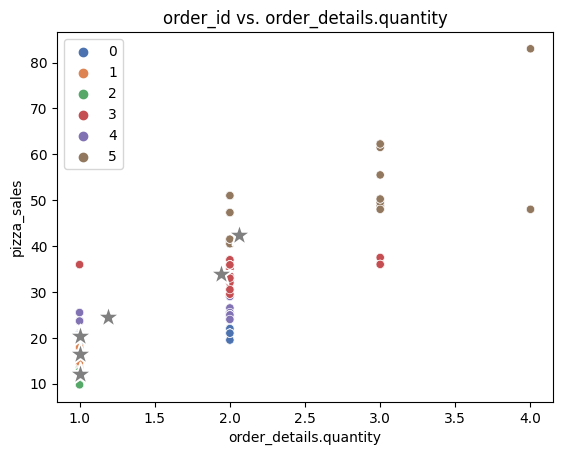

In [ ]:
sns.scatterplot(x=df['order_details.quantity'] , y= df['pizza_sales'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'gray',
    marker= '*',
    s= 300
)
plt.xlabel("order_details.quantity")
plt.ylabel("pizza_sales")
plt.title("order_id vs. order_details.quantity");

In [ ]:
xgb= df_split.groupby(final_model.labels_).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "order_id and pizzas_sales by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()

**EVALUASI MODEL**

In [ ]:
clusters = final_model.fit_predict(df_split)
df["label"] = clusters

df.head()

,order_id,date,time,order_details.pizza_id,order_details.quantity,pizzas.pizza_type_id,pizzas.size,pizzas.price,pizza_sales,pizza_types.Column2,pizza_types.Column3,label
0,1,1/1/2015,11:38:36 AM,hawaiian_m,1.0,hawaiian,M,13.25,13.25,The Hawaiian Pizza,Classic,2
1,2,1/1/2015,11:57:40 AM,classic_dlx_m,1.0,classic_dlx,M,16.00,16.00,The Classic Deluxe Pizza,Classic,1
2,2,1/1/2015,11:57:40 AM,thai_ckn_l,1.0,thai_ckn,L,20.75,20.75,The Thai Chicken Pizza,Chicken,0
3,2,1/1/2015,11:57:40 AM,five_cheese_l,1.0,five_cheese,L,18.50,18.50,The Five Cheese Pizza,Veggie,0
4,2,1/1/2015,11:57:40 AM,ital_supr_l,1.0,ital_supr,L,20.75,20.75,The Italian Supreme Pizza,Supreme,0


In [ ]:
df = df.drop(['order_details.quantity'],axis=1)
avg_df = df.groupby(['label'], as_index=False).mean()
avg_df

,label,order_id,pizzas.price,pizza_sales
0,0,10668.830082,20.397000,20.424028
1,1,10715.937205,16.387544,16.387544
2,2,10717.631397,12.041514,12.041514
3,3,10979.208219,18.234795,33.944658
4,4,10644.650000,22.310081,24.633468
5,5,10619.280757,20.671924,42.425079


<Axes: xlabel='label', ylabel='pizza_sales'>

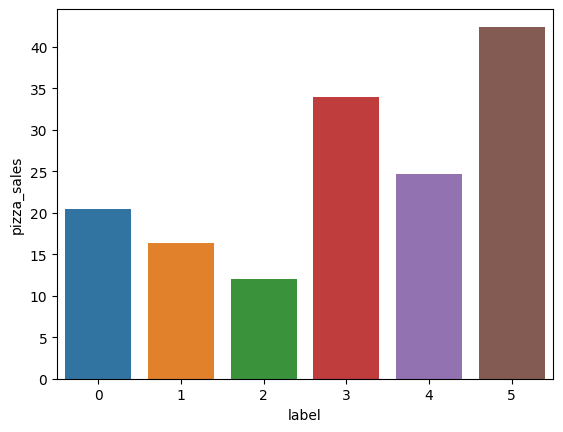

In [ ]:
sns.barplot(x='label',y='pizza_sales',data=avg_df)

<Axes: xlabel='label', ylabel='pizzas.price'>

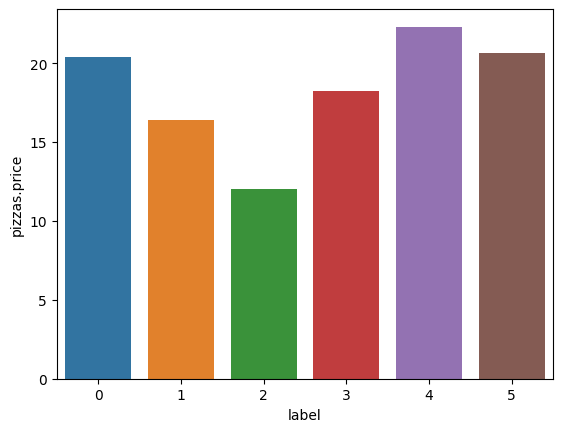

In [ ]:
sns.barplot(x='label',y='pizzas.price',data=avg_df)

**PROPORSI CLUSTER**

In [ ]:
df['label'].value_counts()

1    16960
0    14966
2    14772
4     1240
3      365
5      317
Name: label, dtype: int64

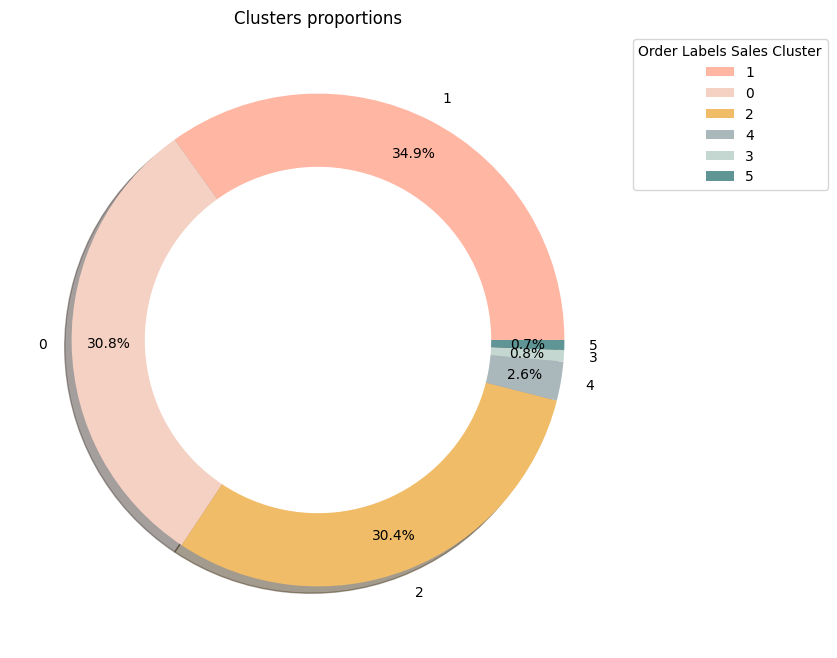

In [ ]:
pal = ["#ffb6a3","#f5d1c3", "#f0bc68", "#aab8bb", "#c4d7d1", "#5f9595"]
sizes = dict(df["label"].value_counts())

plt.figure(figsize=(12, 8))
plt.title("Clusters proportions")
plt.pie(sizes.values(), labels=sizes.keys(), autopct="%.1f%%", pctdistance=0.85, shadow=True, colors = pal)
plt.legend(title="Order Labels Sales Cluster", labels=sizes.keys(), bbox_to_anchor=(1, 1))

my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

In [180]:
plt.savefig('clusters_proportions.png')

<Figure size 640x480 with 0 Axes>

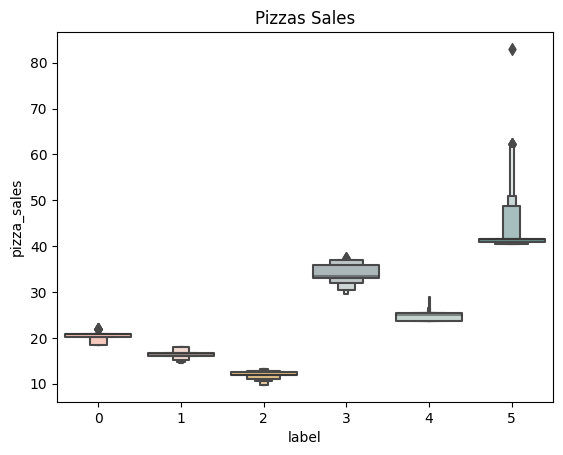

In [ ]:
plt.figure()
pl=sns.boxenplot(y=df["pizza_sales"],x=df["label"], palette= pal)
pl.set_title("Pizzas Sales")
plt.show()

In [ ]:
df2 = pd.DataFrame(df.groupby(['label','pizza_sales'])['pizza_sales'].count())
df2

pizza_sales
label pizza_sales             
0     18.50               1310
      19.50                 12
      20.25               2971
      20.50               1971
      20.75               8485
      21.00                209
      22.00                  8
1     14.50                385
      14.75                568
      15.25                696
      16.00               4428
      16.25               1094
      16.50               3970
      16.75               4211
      17.50                378
      17.95               1230
2     9.75                 727
      10.50                982
      11.00                562
      12.00               5465
      12.25                810
      12.50               3278
      12.75               2485
      13.25                463
3     29.50                  9
      30.50                 16
      32.00                 44
      32.50                 18
      33.00                 69
      33.50                 80
      35.00                  3
      35.90                 43
      35.95                 28
      36.00                  5
      37.00                 48
      37.50                  2
4     23.65                470
      24.00                128
      24.50                 20
      25.00                 48
      25.50                558
      26.50                 10
      29.00                  6
5     40.50                 61
      41.00                 26
      41.50                195
      47.30                 10
      48.00                  4
      48.75                  2
      49.50                  1
      50.25                  3
      51.00                  8
      55.50                  1
      61.50                  1
      62.25                  4
      83.00                  1

In [ ]:
from sklearn import metrics
metrics.rand_score(labels, clusters)

1.0

In [ ]:
metrics.adjusted_rand_score(labels, clusters)

1.0